In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix as cm

In [ ]:
df = pd.read_csv('emails.csv')

In [ ]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df.isna().any().value_counts()

,count
False,3002


In [ ]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [ ]:
df.drop('Email No.',axis=1,inplace=True)

In [ ]:
x = df.drop('Prediction',axis=1)
y = df['Prediction']

In [ ]:
xtrain,xtest,ytrain,ytest = tts(x,y,test_size=0.2)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(xtrain,ytrain)
knn_ypred = knn.predict(xtest)

<Axes: >

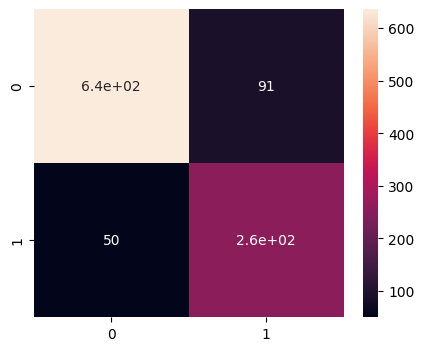

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm(ytest,knn_ypred),annot=True)

In [ ]:
knn_cm=cm(ytest,knn_ypred)

tn_knn, fp_knn = knn_cm[0]
fn_knn, tp_knn = knn_cm[1]

accuracy_knn = (tp_knn + tn_knn) / (tp_knn + tn_knn + fp_knn + fn_knn)
precision_knn = tp_knn / (tp_knn + fp_knn) if (tp_knn + fp_knn) != 0 else 0
error_rate_knn = (fp_knn + fn_knn) / (tp_knn + tn_knn + fp_knn + fn_knn)
recall_knn = tp_knn / (tp_knn + fn_knn) if (tp_knn + fn_knn) != 0 else 0

In [ ]:
print("KNN Metrics:")
print(f"Accuracy: {accuracy_knn:.2f}")
print(f"Precision: {precision_knn:.2f}")
print(f"Error Rate: {error_rate_knn:.2f}")
print(f"Recall: {recall_knn:.2f}")

KNN Metrics:
Accuracy: 0.86
Precision: 0.74
Error Rate: 0.14
Recall: 0.84


In [ ]:
svm = SVC(kernel='linear')
svm.fit(xtrain, ytrain)
svm_ypred = svm.predict(xtest)

<Axes: >

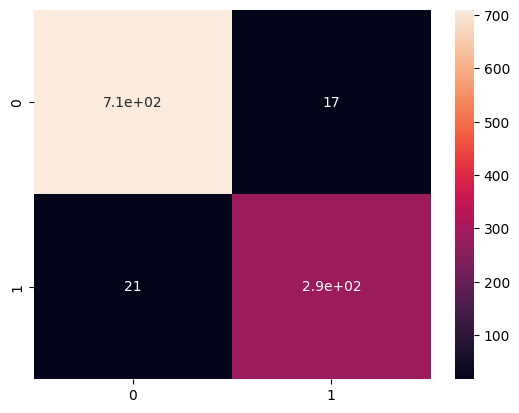

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(cm(ytest,svm_ypred),annot=True)

In [ ]:
svm_cm=cm(ytest,svm_ypred)

tn_svm, fp_svm = svm_cm[0]
fn_svm, tp_svm = svm_cm[1]

accuracy_svm = (tp_svm + tn_svm) / (tp_svm + tn_svm + fp_svm + fn_svm)
precision_svm = tp_svm / (tp_svm + fp_svm) if (tp_svm + fp_svm) != 0 else 0
error_rate_svm = (fp_svm + fn_svm) / (tp_svm + tn_svm + fp_svm + fn_svm)
recall_svm = tp_svm / (tp_svm + fn_svm) if (tp_svm + fn_svm) != 0 else 0

In [ ]:
print("svm Metrics:")
print(f"Accuracy: {accuracy_svm:.2f}")
print(f"Precision: {precision_svm:.2f}")
print(f"Error Rate: {error_rate_svm:.2f}")
print(f"Recall: {recall_svm:.2f}")

svm Metrics:
Accuracy: 0.96
Precision: 0.94
Error Rate: 0.04
Recall: 0.93
